In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk import TweetTokenizer
from nltk.tokenize import word_tokenize
import re
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [6]:

data=pd.read_csv('/Users/ishaq/Downloads/archive/train.csv')
data.head()

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg


In [7]:
data.tail()

,text,sentiment
24995,"This film is fun, if your a person who likes a...",pos
24996,After seeing this film I feel like I know just...,pos
24997,first this deserves about 5 stars due to actin...,neg
24998,If you like films that ramble with little plot...,neg
24999,"As interesting as a sheet of cardboard, this d...",neg


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


Data Exploration

In [9]:
data['sentiment'].value_counts()

sentiment
neg    12500
pos    12500
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

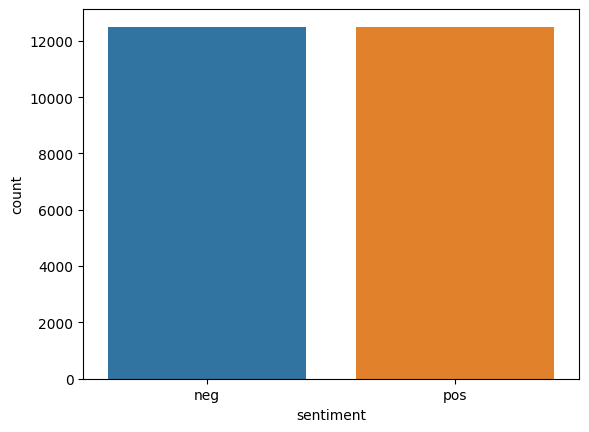

In [10]:
sns.countplot(x=data['sentiment'])

In [11]:
data['text_count']=data['text'].apply(len)

In [12]:
data

,text,sentiment,text_count
0,"Now, I won't deny that when I purchased this o...",neg,719
1,"The saddest thing about this ""tribute"" is that...",neg,1857
2,Last night I decided to watch the prequel or s...,neg,945
3,I have to admit that i liked the first half of...,neg,913
4,I was not impressed about this film especially...,neg,985
...,...,...,...
24995,"This film is fun, if your a person who likes a...",pos,245
24996,After seeing this film I feel like I know just...,pos,780
24997,first this deserves about 5 stars due to actin...,neg,4973
24998,If you like films that ramble with little plot...,neg,1134


pre-processing data(NLTK)

In [13]:
data['sentiment_map']=data['sentiment'].apply(lambda x:1 if x=='pos' else 0)
data

,text,sentiment,text_count,sentiment_map
0,"Now, I won't deny that when I purchased this o...",neg,719,0
1,"The saddest thing about this ""tribute"" is that...",neg,1857,0
2,Last night I decided to watch the prequel or s...,neg,945,0
3,I have to admit that i liked the first half of...,neg,913,0
4,I was not impressed about this film especially...,neg,985,0
...,...,...,...,...
24995,"This film is fun, if your a person who likes a...",pos,245,1
24996,After seeing this film I feel like I know just...,pos,780,1
24997,first this deserves about 5 stars due to actin...,neg,4973,0
24998,If you like films that ramble with little plot...,neg,1134,0


In [14]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ishaq\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ishaq\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ishaq\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [15]:
review=data['text']

In [16]:

tk=TweetTokenizer()
review=review.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
review

0        Now , I won't deny that when I purchased this ...
1        The saddest thing about this " tribute " is th...
2        Last night I decided to watch the prequel or s...
3        I have to admit that i liked the first half of...
4        I was not impressed about this film especially...
                               ...                        
24995    This film is fun , if your a person who likes ...
24996    After seeing this film I feel like I know just...
24997    first this deserves about 5 stars due to actin...
24998    If you like films that ramble with little plot...
24999    As interesting as a sheet of cardboard , this ...
Name: text, Length: 25000, dtype: object

In [17]:
review=review.str.replace('[^a-zA-Z0-9]+',' ')
review

0        Now , I won't deny that when I purchased this ...
1        The saddest thing about this " tribute " is th...
2        Last night I decided to watch the prequel or s...
3        I have to admit that i liked the first half of...
4        I was not impressed about this film especially...
                               ...                        
24995    This film is fun , if your a person who likes ...
24996    After seeing this film I feel like I know just...
24997    first this deserves about 5 stars due to actin...
24998    If you like films that ramble with little plot...
24999    As interesting as a sheet of cardboard , this ...
Name: text, Length: 25000, dtype: object

In [18]:
review=review.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
review

0        Now n't deny that when purchased this off eBay...
1        The saddest thing about this tribute that almo...
2        Last night decided watch the prequel shall say...
3        have admit that liked the first half Sleepers ...
4        was not impressed about this film especially f...
                               ...                        
24995    This film fun your person who likes good campy...
24996    After seeing this film feel like know just lit...
24997    first this deserves about stars due acting som...
24998    you like films that ramble with little plot ex...
24999    interesting sheet cardboard this dispensable p...
Name: text, Length: 25000, dtype: object

In [19]:
stemmer=SnowballStemmer("english")
review=review.apply(lambda x:[stemmer.stem(i.lower())for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
review

0        now n't deni that when purchas this off ebay h...
1        the saddest thing about this tribut that almos...
2        last night decid watch the prequel shall say t...
3        have admit that like the first half sleeper lo...
4        was not impress about this film especi for the...
                               ...                        
24995    this film fun your person who like good campi ...
24996    after see this film feel like know just littl ...
24997    first this deserv about star due act some whic...
24998    you like film that rambl with littl plot expos...
24999    interest sheet cardboard this dispens period p...
Name: text, Length: 25000, dtype: object

In [20]:
stop=stopwords.words('english')
review=review.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
review

0        n't deni purchas ebay high expect incred out-o...
1        saddest thing tribut almost singer includ othe...
2        last night decid watch prequel shall say call ...
3        admit like first half sleeper look good act ev...
4        impress film especi fact went cinema famili go...
                               ...                        
24995    film fun person like good campi featur film ev...
24996    see film feel like know littl bit usa david ly...
24997    first deserv star due act would give better su...
24998    like film rambl littl plot exposit spice kinki...
24999    interest sheet cardboard dispens period piec l...
Name: text, Length: 25000, dtype: object

In [21]:
vector=CountVectorizer()
cv=vector.fit_transform(review).toarray()


In [22]:
x=cv
y=data['sentiment_map']

model creation

In [23]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [24]:
mb=MultinomialNB()
mb.fit(x_train,y_train)

MultinomialNB()

In [25]:
y_pred=mb.predict(x_test)
y

0        0
1        0
2        0
3        0
4        0
        ..
24995    1
24996    1
24997    0
24998    0
24999    0
Name: sentiment_map, Length: 25000, dtype: int64

model evaluvation

In [26]:
accuaracy=accuracy_score(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
accuaracy

0.85952

In [27]:
matrix

array([[2717,  372],
       [ 506, 2655]], dtype=int64)

In [28]:
report

'              precision    recall  f1-score   support\n\n           0       0.84      0.88      0.86      3089\n           1       0.88      0.84      0.86      3161\n\n    accuracy                           0.86      6250\n   macro avg       0.86      0.86      0.86      6250\nweighted avg       0.86      0.86      0.86      6250\n'